In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
def equation_to_fit(x, Vmax, Kd, basal, n):
    return ((Vmax * x**n) / (Kd + x**n)) + basal
list_of_params_to_fit = ['Vmax', 'Kd', 'basal', 'n']

In [4]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', fit_param_values[each], 'with a standard deviation of', fit_param_stdevs[each])

In [16]:
#path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/TestData.xlsx"
path = "/Users/Nicholas/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
MyData = pd.read_excel(path)
MyData

,x,y
0,2000.00,648.00
1,1000.00,652.00
2,500.00,629.00
3,100.00,568.00
4,50.00,571.00
5,10.00,203.00
6,5.00,179.00
7,1.00,71.20
8,0.50,39.30
9,0.10,5.28


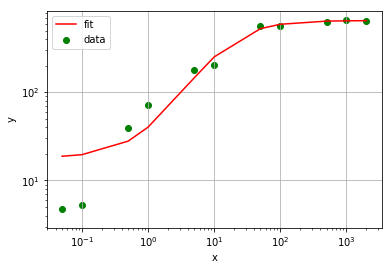

Vmax is 631.68545374 with a standard deviation of 26.6062501646
Kd is 27.6556241763 with a standard deviation of 13.7664334703
basal is 18.2177235815 with a standard deviation of 15.4128482368
n is 1.2108587789 with a standard deviation of 0.185069284824


In [17]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [1, 1, 1, 1]
low_bounds = [0, 0, 0, 0]
up_bounds = [10000, 10000, 10000, 10000]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.x, MyData.y, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

plt.scatter(MyData.x, MyData.y, c='g', label='data')
plt.plot(MyData.x, equation_to_fit(MyData.x, *fit_params), c='r', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()
report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)

In [19]:
MyData.iloc[0,:]

x    2000.0
y     648.0
Name: 0, dtype: float64

In [20]:
MyData.iloc[:,0]

0     2000.00
1     1000.00
2      500.00
3      100.00
4       50.00
5       10.00
6        5.00
7        1.00
8        0.50
9        0.10
10       0.05
11       0.00
Name: x, dtype: float64